# Rank chart
 America's most popular sports

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import rankdata

In [11]:
#load data
df = pd.read_excel("Data.xlsx")

#remove 'Other' category
df = df[df["Sport"]!='Other']

# create ranks
data = pd.melt(df, id_vars = "Sport", var_name="Year", value_name="Percent")
data["rank"] = data.groupby("Year")["Percent"].transform(lambda x: rankdata(-x))

#where multiple sports in rank, round down
data["rank"] = data["rank"].apply(np.floor)

#remove where no opinion
data = data[data["Sport"]!="No opinion"]

#rename long sport names
rename_sports = {"Ice/Figure skating": "Figure skating", "Track and field" : "Track & field"}
data["Sport"] = data["Sport"].replace(rename_sports)

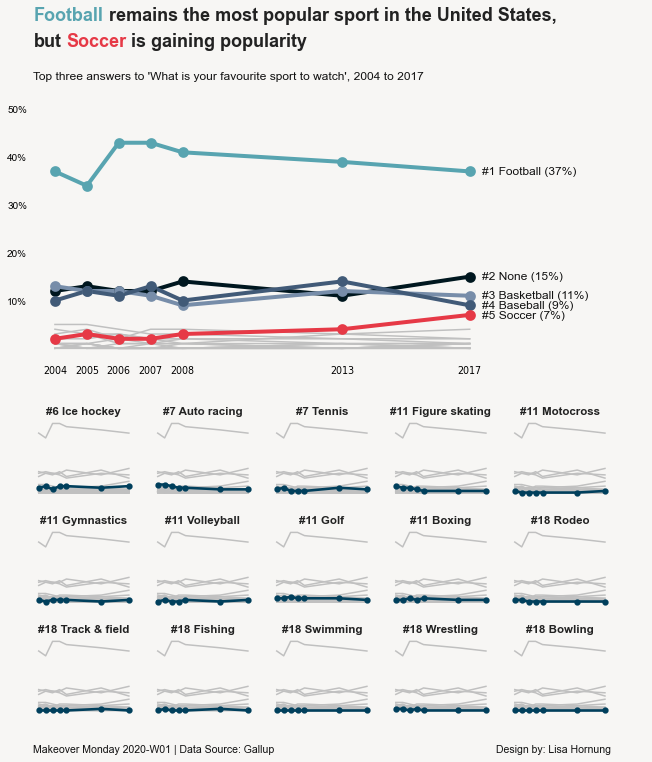

In [221]:
# =========
# Initialise Figure and define layout
fig = plt.figure(figsize=(10,9))
fig.set_facecolor("#f7f6f4")

# Add axes objects of the size we want
ax  = plt.subplot2grid(shape=(2,5), loc=(0,0), colspan=4)
ax1 = fig.add_subplot(6,5,16)
ax2 = fig.add_subplot(6,5,17)
ax3 = fig.add_subplot(6,5,18)
ax4 = fig.add_subplot(6,5,19)
ax5 = fig.add_subplot(6,5,20)
ax6 = fig.add_subplot(6,5,21)
ax7 = fig.add_subplot(6,5,22)
ax8 = fig.add_subplot(6,5,23)
ax9 = fig.add_subplot(6,5,24)
ax10 = fig.add_subplot(6,5,25)
ax11 = fig.add_subplot(6,5,26)
ax12 = fig.add_subplot(6,5,27)
ax13 = fig.add_subplot(6,5,28)
ax14 = fig.add_subplot(6,5,29)
ax15 = fig.add_subplot(6,5,30)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16]
plt.subplots_adjust(left=0.001, bottom=0.01, right=0.8, top=0.98, wspace=0.2, hspace=0.3)

# ======== 
# function for adding direct labels
def add_label(x,y,label, rank, fontsize, ax):
    PAD = 0.4
    ax.annotate(
        f"#{int(rank)} {label} ({int(y)}%)", 
        xy=(x + PAD, y), 
        ha="left", 
        va="center",
        fontsize=fontsize,
        zorder=12,
        color="#111111", 
        fontfamily="Arial"
    )

# =====
# plot data

SPORTS = data[data["Year"]==2017][["Sport", "rank"]].sort_values(by="rank")["Sport"].to_list()
colours = {'Football': "#58a4b0", 'Basketball': "#778da9", 'Baseball': "#415a77", 'None':"#00171f",
          "Soccer" : "#e63946"}
other = "#C0C0C0"
other_highlight = "#003f5c"

# =====
# Create top chart
# Loop through countries
for sport in SPORTS:
    
    # Filter data to keep rows of the country
    d = data[data["Sport"] == sport] 
    x = d["Year"].values
    y = d["Percent"].values
    rank = d["rank"].values
    
    if sport in SPORTS[:5]:
        ax.plot(x, y, color=colours[sport], lw=4, zorder=10)
        ax.scatter(x, y, fc=colours[sport], ec=colours[sport], s=45, lw=4, zorder=12)   
        # Pass the first and last values to the add_label function
        add_label(x[0], y[0], sport, rank[0], 12, ax)
    else:
        ax.plot(x, y, color=other)
        #ax.scatter(x, y, fc=other, ec=other, s=20, lw=2.4, zorder=12) 

        
# Remove vertical ticks
ax.set_yticks([0,10,20,30,40,50, 55])
ax.set_yticklabels(["","10%","20%","30%","40%","50%", ""], fontfamily="Arial")

# Set location of horizontal ticks
ax.set_xticks([2004, 2005, 2006, 2007, 2008, 2013, 2017], )
ax.set_xticklabels([2004, 2005, 2006, 2007, 2008, 2013, 2017],fontsize=9.5)

# Remove tick marks in bottom horizontal axis
ax.tick_params(bottom=False, left=False)

# Remove the frame
ax.set_frame_on(False)
#ax.margins(y=-0.1)

# ======
# Other sports

for i in range(len(axes)):
    
    #focus = SPORTS[3]
    
    for sport in SPORTS:
        
        # Filter data to keep rows of the country
        d = data[data["Sport"] == sport] 
        x = d["Year"].values
        y = d["Percent"].values
        rank = d["rank"].values
        
        if sport in SPORTS[i+5:i+6]:
            axes[i].plot(x, y, color=other_highlight, lw=2.6, zorder=10)
            axes[i].scatter(x, y, fc=other_highlight, ec=other_highlight, s=15, lw=2.4, zorder=12)   
            # Set title
            axes[i].set_title(f"#{int(rank[0])} {sport}", fontsize=11.5, fontweight='bold',
                              color="#222222", y=0.9, fontfamily="Arial")
        else:
            axes[i].plot(x, y, color=other)
    
            
    # Remove vertical ticks
    axes[i].set_yticks([0,25, 50])
    #axes[i].set_yticklabels(["","25%", "50%"], fontsize=8)
    axes[i].set_yticklabels(["","", ""], fontsize=8)
    
    # Set location of horizontal ticks
    axes[i].set_xticks([2004, 2005, 2006, 2007, 2008, 2013, 2017], )
    axes[i].set_xticklabels([],fontsize=9)
    
    # Remove tick marks in bottom horizontal axis
    axes[i].tick_params(bottom=False, left=False)
    
    # Remove the frame
    axes[i].set_frame_on(False)

# ======
# title
plt.figtext(0,1.08,'Football',
         fontsize = 18, weight = 'bold', fontfamily='Arial', color=colours["Football"])
plt.figtext(0.105,1.08,'remains the most popular sport in the United States,',
         fontsize = 18, weight = 'bold', fontfamily='Arial', color="#222222")
plt.figtext(0,1.04,'but',
         fontsize = 18, weight = 'bold', fontfamily='Arial', color="#222222")
plt.figtext(0.045,1.04,'Soccer',
         fontsize = 18, weight = 'bold', fontfamily='Arial', color=colours["Soccer"])
plt.figtext(0.135,1.04,'is gaining popularity',
         fontsize = 18, weight = 'bold', fontfamily='Arial', color="#222222")
plt.figtext(0,0.99, "Top three answers to 'What is your favourite sport to watch', 2004 to 2017", 
            fontsize=12, ha='left',  color="#111111", fontfamily="Arial")


#footer
plt.figtext(0,-0.05, "Makeover Monday 2020-W01 | Data Source: Gallup", fontsize=10.5, ha='left', color="#111111", fontfamily="Arial")
plt.figtext(0.85,-0.05, "Design by: Lisa Hornung            ", fontsize=10.5, ha='right', color="#111111", fontfamily="Arial")

plt.savefig("MakeoverMonday2020W01_most-popular-sport-US.png", bbox_inches="tight",pad_inches=0.4)
plt.show()

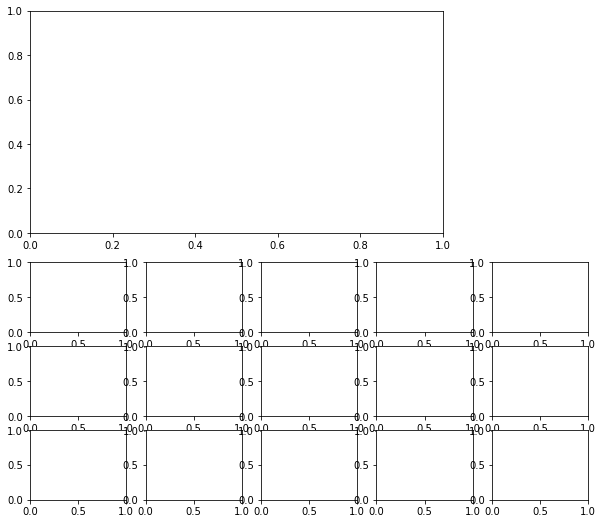

In [147]:
# play around with layout
fig = plt.figure(figsize=(10,9))

# Add axes objects of the size we want
ax  = plt.subplot2grid(shape=(2,4), loc=(0,0), colspan=3)
ax1 = fig.add_subplot(6,5,16)
ax2 = fig.add_subplot(6,5,17)
ax3 = fig.add_subplot(6,5,18)
ax4 = fig.add_subplot(6,5,19)
ax5 = fig.add_subplot(6,5,20)
ax6 = fig.add_subplot(6,5,21)
ax7 = fig.add_subplot(6,5,22)
ax8 = fig.add_subplot(6,5,23)
ax9 = fig.add_subplot(6,5,24)
ax10 = fig.add_subplot(6,5,25)
ax11 = fig.add_subplot(6,5,26)
ax12 = fig.add_subplot(6,5,27)
ax13 = fig.add_subplot(6,5,28)
ax14 = fig.add_subplot(6,5,29)
ax15 = fig.add_subplot(6,5,30)

plt.show()

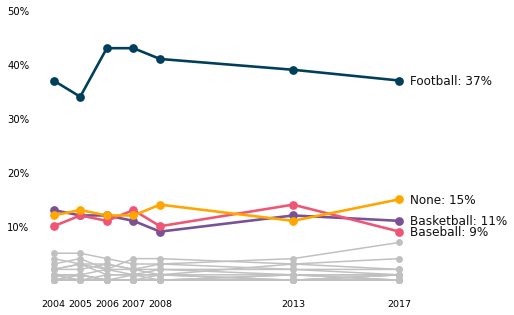

In [15]:
# single chart
SPORTS = data["Sport"].unique()
SPORT = SPORTS[0]

top_four = ['Football', 'Basketball', 'Baseball', 'None']
colours = {'Football': "#003f5c", 'Basketball': "#7a5195", 'Baseball': "#ef5675", 'None':"#ffa600"}
other = "#C0C0C0"

# Initialize figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Invert vertical axis to show rank 1 on top
#ax.invert_yaxis()

ax = plt.subplot2grid(shape=(3, 2), loc=(1, 0), rowspan=2)

# Loop through countries
for sport in SPORTS:
    
    # Filter data to keep rows of the country
    d = data[data["Sport"] == sport] 
    x = d["Year"].values
    y = d["Percent"].values
    rank = d["rank"].values
    
    if sport in top_four:
        ax.plot(x, y, color=colours[sport], lw=2.6, zorder=10)
        ax.scatter(x, y, fc=colours[sport], ec=colours[sport], s=40, lw=2.4, zorder=12)   
        # Pass the first and last values to the add_label function
        add_label(x[0], y[0], sport, 12, ax)
    else:
        ax.plot(x, y, color=other)
        ax.scatter(x, y, fc=other, ec=other, s=20, lw=2.4, zorder=12) 

        
# Remove vertical ticks
ax.set_yticks([0,10,20,30,40,50])
ax.set_yticklabels(["","10%","20%","30%","40%","50%"])

# Set location of horizontal ticks
ax.set_xticks([2004, 2005, 2006, 2007, 2008, 2013, 2017], )
ax.set_xticklabels([2004, 2005, 2006, 2007, 2008, 2013, 2017],fontsize=9.5)

# Remove tick marks in bottom horizontal axis
ax.tick_params(bottom=False, left=False)

# Remove the frame
ax.set_frame_on(False)
